In [74]:
import pandas as pd
from scipy.stats import *

In [75]:
data = {
    "Average Hourly Temperature (°F)": [28.0, 28.0, 32.5, 39.0, 45.9, 57.8, 58.1, 62.5],
    "Natural Gas Consumption (MMcf)": [12.4, 11.7, 12.4, 10.8, 9.4, 9.5, 8.0, 7.5]
}
weeks = [1, 2, 3, 4, 5, 6, 7, 8]
df = pd.DataFrame(data, index=weeks)
df

,Average Hourly Temperature (°F),Natural Gas Consumption (MMcf)
1,28.0,12.4
2,28.0,11.7
3,32.5,12.4
4,39.0,10.8
5,45.9,9.4
6,57.8,9.5
7,58.1,8.0
8,62.5,7.5


In [76]:
def least_squares_points(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    ss_xy = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
    ss_xx = sum((xi - x_mean) ** 2 for xi in x)
    b1 = ss_xy / ss_xx
    b0 = y_mean - b1 * x_mean
    return b0, b1

In [77]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

b1, b0 = np.polyfit(x, y, 1)
print(f"Intercept (b0) = {b0:.4f}")
print(f"Slope (b1) = {b1:.4f}")

Intercept (b0) = 15.8379
Slope (b1) = -0.1279


In [78]:
x0 = 40  # Average Hourly Temperature (°F)
predict_y = b0 + b1 * x0
print(f"For an average temperature of {x}°F, the predicted value of y is {predict_y:.3f} MMcF.")


For an average temperature of 1    28.0
2    28.0
3    32.5
4    39.0
5    45.9
6    57.8
7    58.1
8    62.5
Name: Average Hourly Temperature (°F), dtype: float64°F, the predicted value of y is 10.721 MMcF.


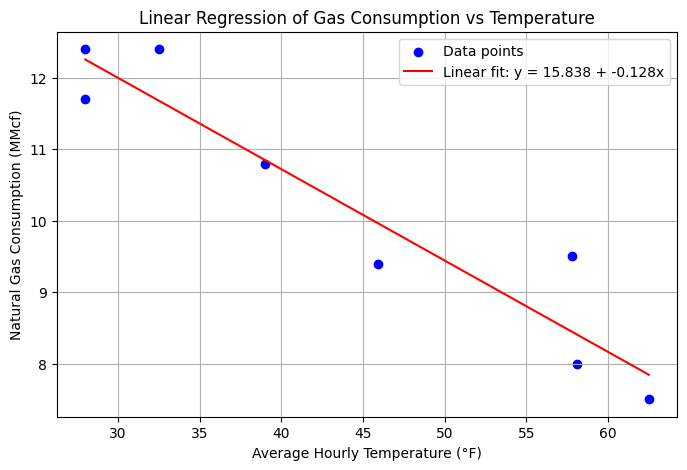

In [79]:
import matplotlib.pyplot as plt

x_line = np.linspace(x.min(), x.max(), 100)
y_line = b0 + b1 * x_line

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', label=f'Linear fit: y = {b0:.3f} + {b1:.3f}x')
plt.xlabel('Average Hourly Temperature (°F)')
plt.ylabel('Natural Gas Consumption (MMcf)')
plt.title('Linear Regression of Gas Consumption vs Temperature')
plt.legend()
plt.grid(True)
plt.show()
